In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dance_comparison.Motion import BVH
from dance_comparison.Motion.Animation import positions_global

animation, joints_names, _ = BVH.load("./choreography_fixed.bvh")
pose_data = positions_global(animation)

In [2]:
animation.parents

array([-1,  0,  1,  2,  3,  4,  5,  3,  7,  8,  9, 10, 11, 12, 13,  3, 15,
       16, 17, 18, 19, 20, 21,  0, 23, 24, 25, 26,  0, 28, 29, 30, 31])

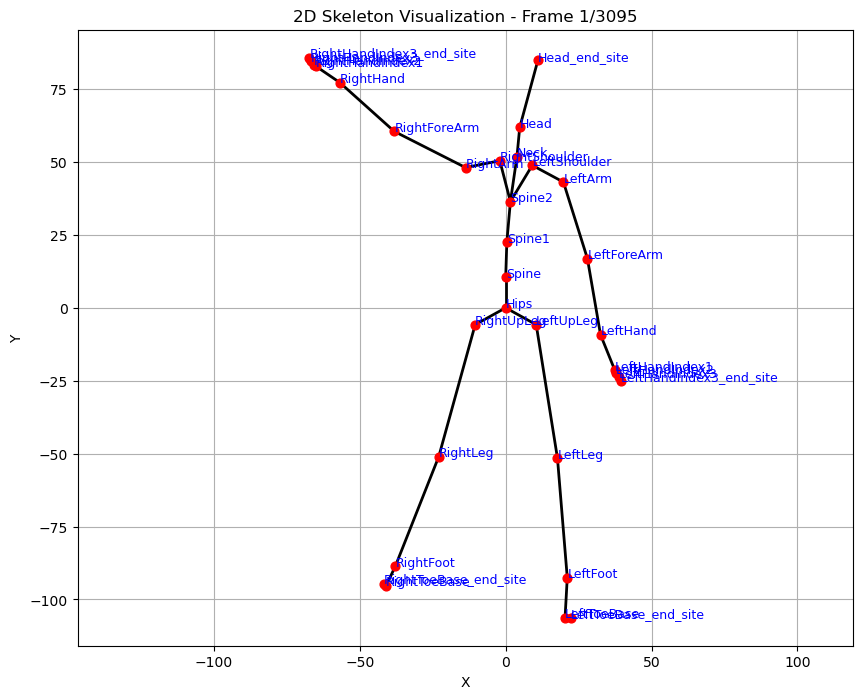

In [7]:
# Function to draw a single frame of the skeleton
def draw_frame(ax, pose_data, joints_names, animation_parents, frame_idx):
    ax.clear()

    # Get the data for the current frame
    frame_data = pose_data[frame_idx]

    # Plot the skeleton connections
    for child_idx, parent_idx in enumerate(animation_parents):
        if parent_idx == -1:
            continue  # Skip the root (no parent)

        # Get coordinates for parent and child
        parent_coord = frame_data[parent_idx, :2]  # X, Y of the parent
        child_coord = frame_data[child_idx, :2]  # X, Y of the child

        # Draw a line between the parent and child
        ax.plot([parent_coord[0], child_coord[0]], [parent_coord[1], child_coord[1]], 'k-', lw=2)

    # Plot each joint and annotate it with its name
    for idx, (x, y, _) in enumerate(frame_data):
        ax.scatter(x, y, color='red', s=40, zorder=5)  # Plot the joint as a red dot
        ax.text(x, y, f"{joints_names[idx]}", fontsize=9, color='blue', zorder=10)

    # Configure the plot
    ax.set_title(f"2D Skeleton Visualization - Frame {frame_idx + 1}/{pose_data.shape[0]}")
    ax.axis("equal")
    # ax.invert_yaxis()  # Invert Y-axis to match most 2D coordinate systems for poses
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)

# Interactive visualization
def visualize_skeleton(pose_data, joints_names, animation_parents):
    num_frames = pose_data.shape[0]
    frame_idx = [0]  # Use a mutable object to track the frame index

    fig, ax = plt.subplots(figsize=(10, 8))

    # Initial draw
    draw_frame(ax, pose_data, joints_names, animation_parents, frame_idx[0])

    def on_key(event):
        if event.key == ' ':
            # Advance to the next frame
            frame_idx[0] = (frame_idx[0] + 1) % num_frames
            draw_frame(ax, pose_data, joints_names, animation_parents, frame_idx[0])
            plt.draw()  # Update the plot

    fig.canvas.mpl_connect('key_press_event', on_key)
    plt.show()

# Call the function to visualize the skeleton interactively
visualize_skeleton(pose_data, joints_names, animation.parents)
